# Extraccion de datos S&P500

In [1]:
# librerias a utilizar
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
#descarga de datos
sp500 = yf.download('^GSPC',start='2000-1-1')
sp500.to_csv('sp500.csv')

[*********************100%***********************]  1 of 1 completed


In [26]:
s = pd.read_csv('sp500.csv')
#s = s[['Date', 'Open', 'High',
 #      'Low', 'Close', 'Adj Close', 'Volume', 'fedClose']].copy()

In [27]:
s['Close']=s['Close'].astype(int)
#

In [29]:
fed = yf.download('ZQ=F',start='2000-1-1')

[*********************100%***********************]  1 of 1 completed


In [30]:
fed = pd.read_csv('futuro_fondos_federales.csv')

In [32]:
#regresion lineal
n=len(sp500.index)
x=np.array(pd.to_datetime(sp500.index).year)
y=sp500['Close']
pendiente= ((n*(x*y).sum())-(x.sum()*y.sum()))/(n*(x**2).sum()-(x.sum())**2)
c_origen= (y.sum()-(x.sum()*pendiente))/n
reg_y = pendiente*x+c_origen

In [40]:
#agregar columna de regresion
s['Regresion']=reg_y.astype(int)

In [41]:
s['fedClose']=fed['Close'].astype(int)
s.to_csv('sp500.csv',index=False)

In [34]:
#Futuros de fondos federales a treinta días
fed
fed.to_csv('futuro_fondos_federales.csv')

In [3]:
sp500.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5843 entries, 2000-01-03 to 2023-03-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5843 non-null   float64
 1   High       5843 non-null   float64
 2   Low        5843 non-null   float64
 3   Close      5843 non-null   float64
 4   Adj Close  5843 non-null   float64
 5   Volume     5843 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 319.5 KB


In [9]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5.843000e+03
mean,1893.941774,1905.300185,1881.639927,1894.147854,1894.147854,3.308262e+09
std,982.877782,988.097150,977.210007,982.983970,982.983970,1.525285e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1185.150024,1192.224976,1177.815002,1185.245056,1185.245056,1.992515e+09
50%,1437.209961,1446.640015,1428.569946,1437.500000,1437.500000,3.414370e+09
75%,2410.604980,2421.494995,2393.929932,2409.569946,2409.569946,4.163965e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [127]:
sp500.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

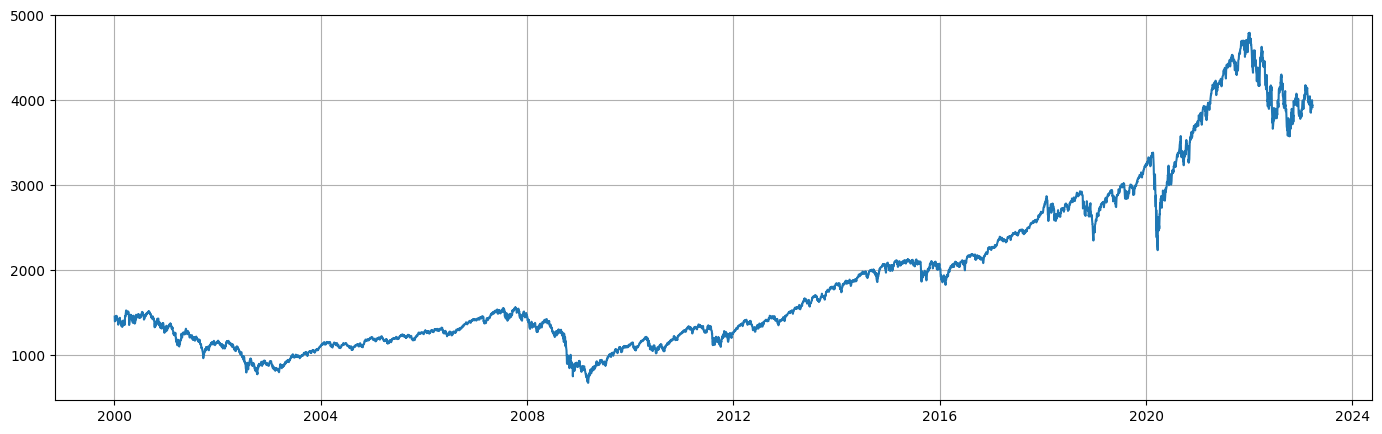

In [8]:
valuesdate = pd.to_datetime(sp500.index)

plt.figure(figsize=(17,5))
plt.grid()
plt.plot(valuesdate,sp500['Close'].values)

In [128]:
#(sp500[sp500.index>'2008-01-01' & sp500.index < '2012-01-01'])
crisis = sp500.query("index > '2008-01-01' and index < '2012-01-01'")

In [28]:
fedcrisis = fed.query("index > '2008-01-01' and index < '2012-01-01'")


In [130]:
valuesdate = pd.to_datetime(crisis.index)
valuesdatefed = pd.to_datetime(fedcrisis.index)

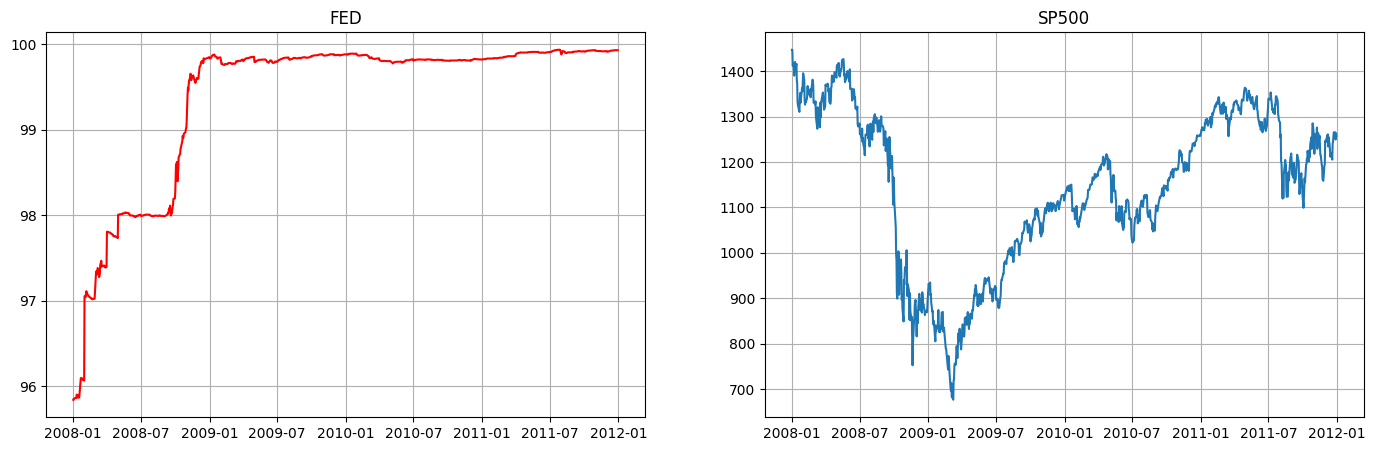

In [131]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 5), sharey=False)
ax1.grid()
ax1.plot(valuesdatefed, fedcrisis['Close'], color='r')
ax1.set_title('FED')
ax2.grid()
ax2.plot(valuesdate, crisis['Close'].values)
ax2.set_title('SP500')
plt.show()

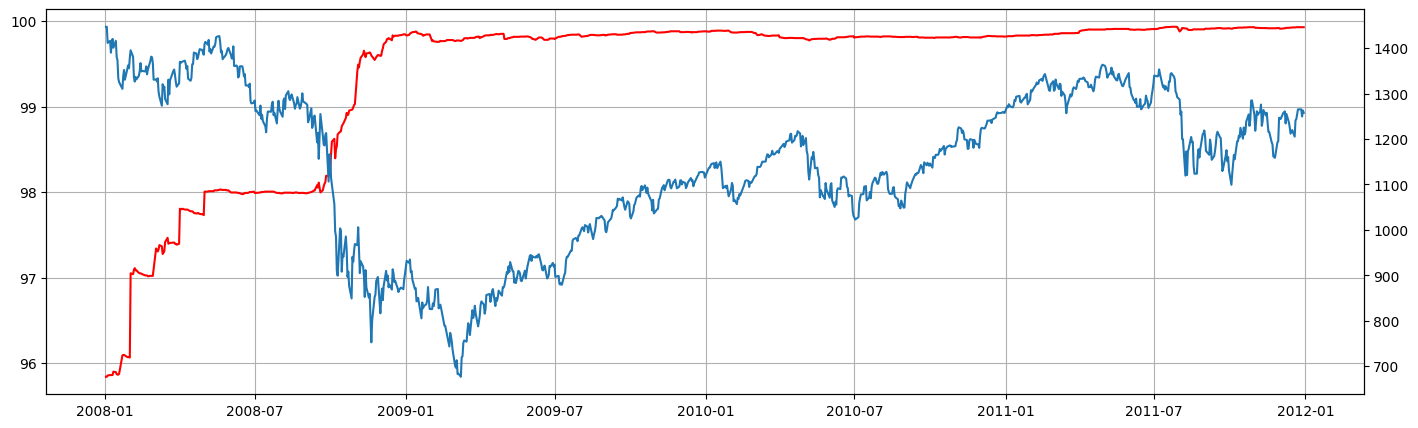

In [33]:
plt.figure(figsize=(17,5))
plt.grid()

# Primera gráfica
plt.plot(valuesdatefed, fedcrisis['Close'], color='r')

# Segunda gráfica en el segundo eje y
ax = plt.gca().twinx() 
ax.plot(valuesdate, crisis['Close'].values)

plt.show()


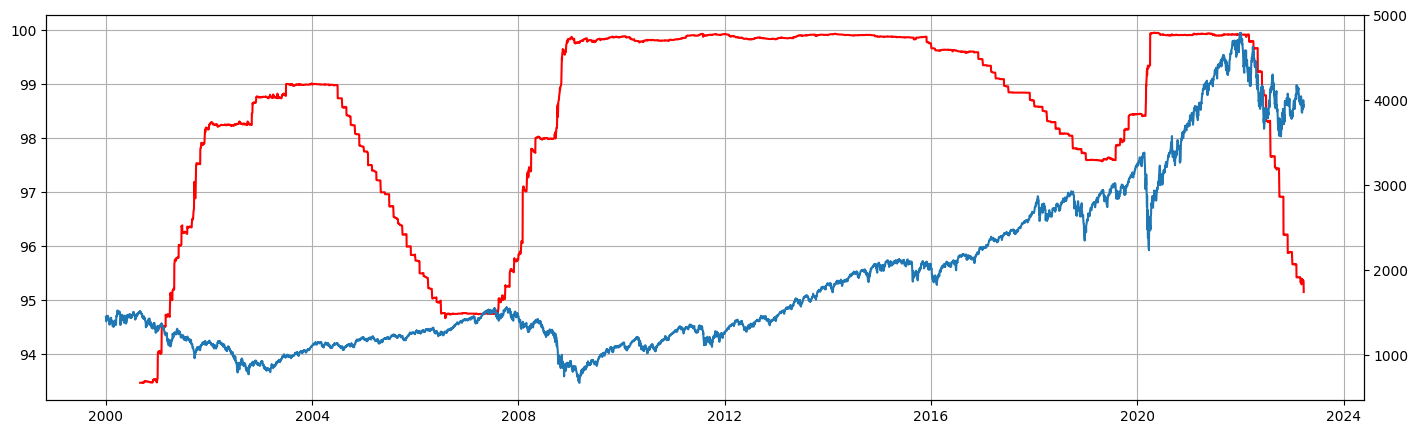

In [39]:
valuesdate= pd.to_datetime(sp500.index)
valuesdatefed = pd.to_datetime(fed.index)
plt.figure(figsize=(17,5))
plt.grid()

# Primera gráfica
plt.plot(valuesdatefed, fed['Close'], color='r')

# Segunda gráfica en el segundo eje y
ax = plt.gca().twinx() 
ax.patch.set_alpha(0)
ax.plot(valuesdate, sp500['Close'].values)

plt.show()

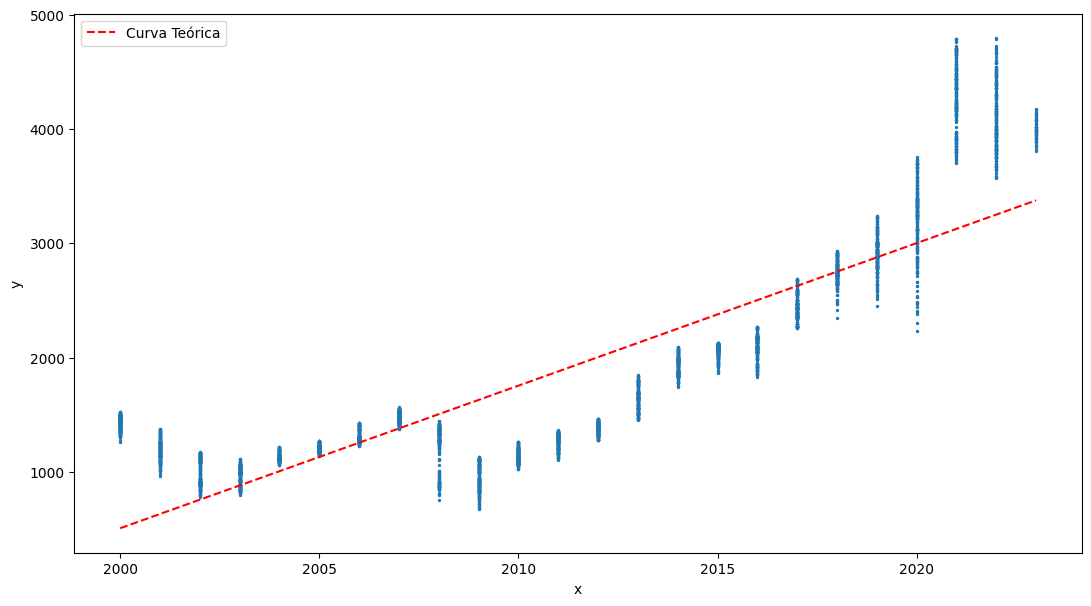

In [50]:
#regresion lineal
n=len(sp500.index)
x=np.array(pd.to_datetime(sp500.index).year)
y=sp500['Close']
pendiente= ((n*(x*y).sum())-(x.sum()*y.sum()))/(n*(x**2).sum()-(x.sum())**2)
c_origen= (y.sum()-(x.sum()*pendiente))/n
reg_y = pendiente*x+c_origen
plt.figure(figsize = (13,7))

plt.scatter(x,y, s = 2)
plt.plot(x, reg_y, '--',label ='Curva Teórica', c = 'r')
#plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

          Close     Close
Close  1.000000  0.149864
Close  0.149864  1.000000


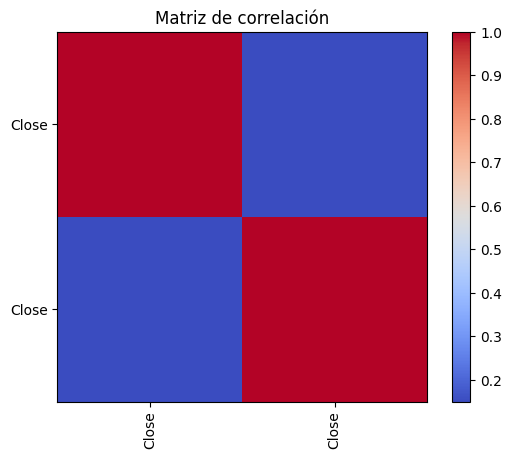

In [133]:
sp500cierre=sp500['Close']
fedcierre= fed['Close']
spfed = pd.concat([sp500cierre,fedcierre],axis=1)
# Creamos la matriz de correlación
correlation_matrix = spfed.corr()
print(correlation_matrix)
# Graficamos la matriz de correlación
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Matriz de correlación')
plt.show()

# Ultimos tres años

In [96]:
#valores de los ultimos tres años
ultimos3sp500 = sp500[sp500.index.year >=2020]
ultimos3fed= fed[fed.index.year >= 2020]
valuesdate= pd.to_datetime(ultimos3sp500.index)
valuesdatefed = pd.to_datetime(ultimos3fed.index)

#regresion lineal
n=len(ultimos3sp500.index)
x=np.array(pd.to_datetime(ultimos3sp500.index).year)
y=ultimos3sp500['Close']
pendiente= ((n*(x*y).sum())-(x.sum()*y.sum()))/(n*(x**2).sum()-(x.sum())**2)
c_origen= (y.sum()-(x.sum()*pendiente))/n
reg_y = pendiente*x+c_origen

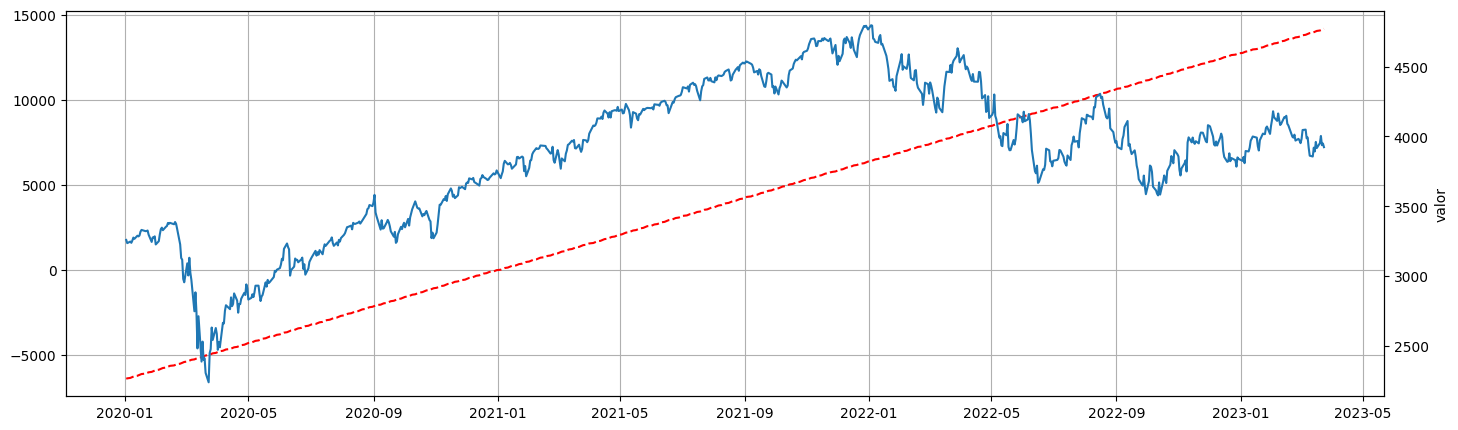

In [101]:

plt.figure(figsize=(17,5))
plt.grid()

# Primera gráfica
plt.plot(valuesdate, reg_y, '--',label ='Curva Teórica', c = 'r')

#segunda grafica
ax = plt.gca().twinx() 
ax.patch.set_alpha(0)
ax.plot(valuesdate, ultimos3sp500['Close'].values)
ax.set_ylabel('valor')
ax.set_ylim(bottom=ultimos3sp500['Close'].min()-100,top=ultimos3sp500['Close'].max()+100)
plt.show()


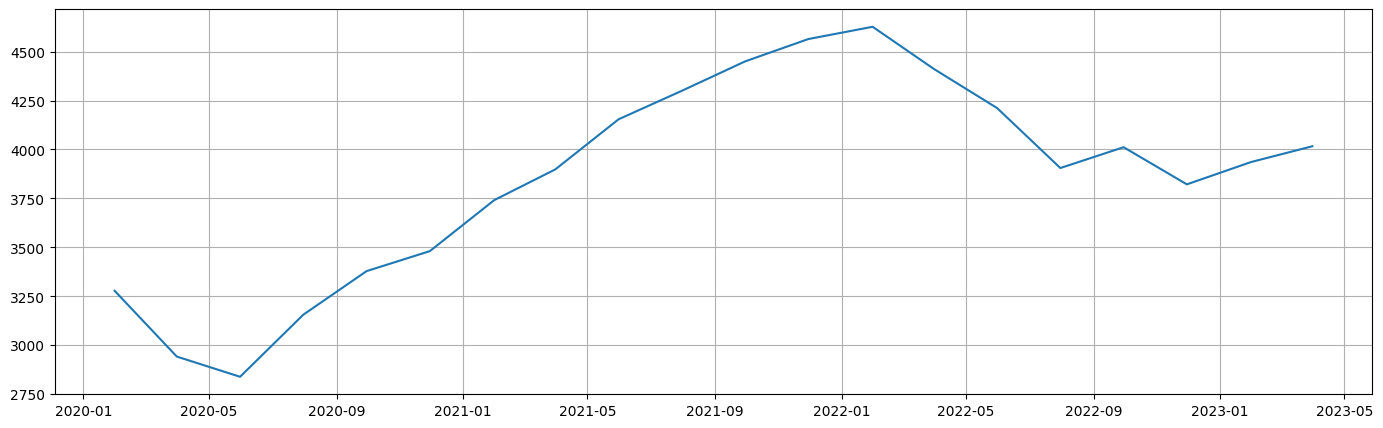

In [123]:
ultimos3cada2m=ultimos3sp500.resample('2M').mean()
plt.figure(figsize=(17,5))
plt.plot(pd.to_datetime(ultimos3cada2m.index),ultimos3cada2m['Close'])
plt.grid()

# Ultimos 6 Meses

In [103]:
#Ultimos 6 meses
meses6sp = sp500.query('index >= "2022-10-01"')

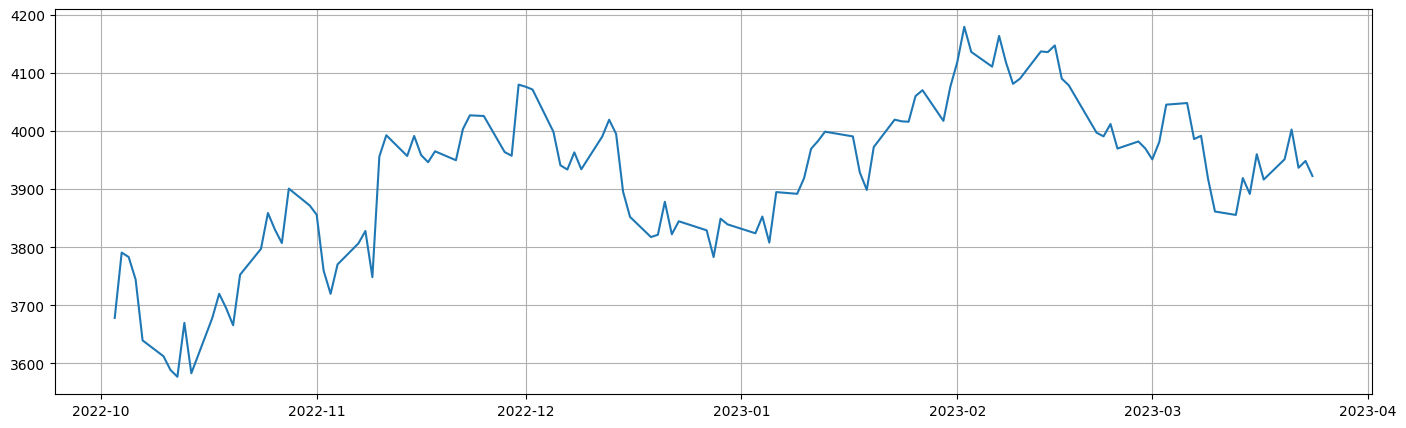

In [135]:
xmeses=pd.to_datetime(meses6sp.index)
plt.figure(figsize=(17,5))
plt.grid()
plt.plot(xmeses,meses6sp['Close'])


In [115]:
# Dividir en valores de cada 2 meses
df_2m = meses6sp.resample('2M').mean()

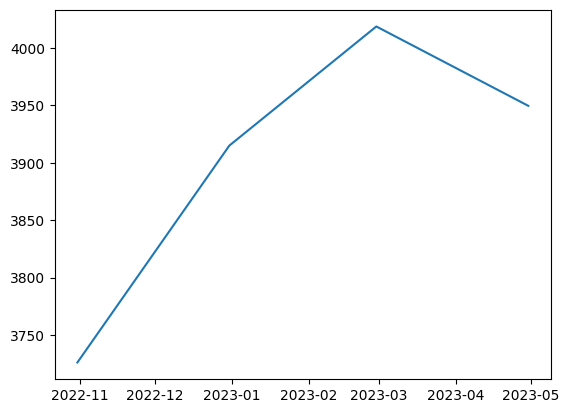

In [117]:
#grafica de cada 2 meses
plt.plot(pd.to_datetime(df_2m.index),df_2m['Close'])

# Ultimo Trimestre

In [124]:
trimestre = sp500.query('index >= "2023-01-01"')

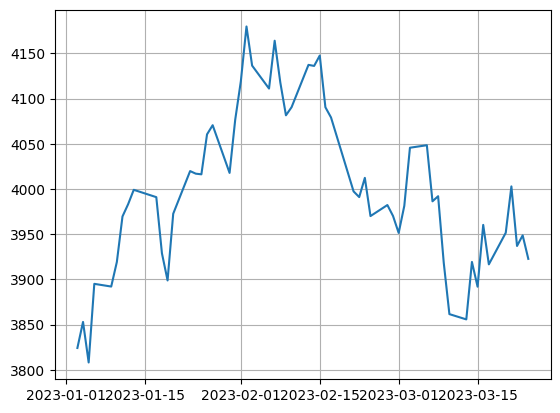

In [126]:
plt.plot(pd.to_datetime(trimestre.index),trimestre['Close'])
plt.grid()

# Porcentaje de Crecimiento

In [147]:
#
def crecimientoPorcentual(max,min):
    #valores
    a = max
    b = min
    #formula diferencia porcentual
    return abs(a - b) / a * 100

#Global
maximo=sp500.index.max()
minimo = sp500.index.min()
max=sp500[sp500.index==maximo]['Close'].values[0]
min=sp500[sp500.index==minimo]['Close'].values[0]
print('crecimiento global desde '+format(minimo)+' ->'+
        format(crecimientoPorcentual(max,min))+'%')

#ultimos 5 años
max=sp500[sp500.index==maximo]['Close'].values[0]
min=sp500[sp500.index.year==2018]['Close'].values[0]
print('crecimiento desde 2018 ->'+
        format(crecimientoPorcentual(max,min))+'%')

#ultimos tres años
max=sp500[sp500.index==maximo]['Close'].values[0]
min=sp500[sp500.index.year==2020]['Close'].values[0]
print('crecimiento desde 2020 ->'+
        format(crecimientoPorcentual(max,min))+'%')

#ultimos 6 meses
max=sp500[sp500.index==maximo]['Close'].values[0]
min=sp500[sp500.index=='2022-10-03']['Close'].values[0]
print('crecimiento desde 2022-10-03 ->'+
        format(crecimientoPorcentual(max,min))+'%')


crecimiento global desde 2000-01-03 00:00:00 ->62.90268755033478%
crecimiento desde 2018 ->31.276844695663648%
crecimiento desde 2020 ->16.948993677889792%
crecimiento desde 2022-10-03 ->6.227328345185475%
